In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
dataTrain = pd.read_csv('../setTrainMap.csv')


In [3]:
dataTrain.head()

,PassengerId,Survived,Age,SibSp,Ticket,Parch,Fare,Sex_female,Pclass_3,Pclass_2,...,Embarked_S,Mr,Mrs,Miss,Master,Dr,OtherTitles,With_Cabin,Old,Kid
0,1,0,22.0,1,21171,0,7.2500,False,True,False,...,True,True,False,False,False,False,False,False,False,False
1,2,1,38.0,1,17599,0,71.2833,True,False,False,...,False,False,True,False,False,False,False,True,False,False
2,3,1,26.0,0,3101282,0,7.9250,True,True,False,...,True,False,False,True,False,False,False,False,False,False
3,4,1,35.0,1,113803,0,53.1000,True,False,False,...,True,False,True,False,False,False,False,True,False,False
4,5,0,35.0,0,373450,0,8.0500,False,True,False,...,True,True,False,False,False,False,False,False,False,False


In [4]:
dataTrain = dataTrain.drop("Embarked_Q",axis=1)
dataTrain = dataTrain.drop("Old",axis=1)
dataTrain = dataTrain.drop("Kid",axis=1)
dataTrain = dataTrain.drop("OtherTitles",axis=1)
dataTrain = dataTrain.drop("Dr",axis=1)
dataTrain = dataTrain.drop("Master",axis=1)
dataTrain = dataTrain.drop("Mrs",axis=1)
dataTrain = dataTrain.drop("Miss",axis=1)
dataTrain = dataTrain.drop("PassengerId",axis=1)
dataTrain = dataTrain.drop("Embarked_S",axis=1)
dataTrain = dataTrain.drop("Parch",axis=1)
dataTrain = dataTrain.drop("Embarked_C",axis=1)



In [5]:
dataPositivos = dataTrain[dataTrain['Survived'] == 1 ]
dataNegativos = dataTrain[dataTrain['Survived'] == 0 ].head(342)
dataTrainBalanceado = pd.concat([dataNegativos,dataPositivos])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataTrainBalanceado.drop(['Survived'], axis=1).values, dataTrainBalanceado["Survived"] , test_size=0.20, random_state=75)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
parameters = {
    "loss":["deviance", "exponential"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'min_samples_split': range(200,1001,200),
    'min_samples_leaf':range(30,71,10),
    "max_depth":[3,5,8,10,15,20],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae","mse"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[5,10,30,50,100,200,300,500,1000]
    }

In [9]:
# First create the base model to tune
# Create a random forest Classifier. By convention, clf means 'Classifier'

clf = GradientBoostingClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.metrics import make_scorer, roc_auc_score,accuracy_score,f1_score
auc = make_scorer(accuracy_score)


rf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring = auc)
# Fit the random search model
rf_random.fit(X_train_scale, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:  1.3min remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [10]:
rf_random.best_params_


{'subsample': 0.9,
 'n_estimators': 500,
 'min_samples_split': 200,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 8,
 'loss': 'deviance',
 'learning_rate': 0.075,
 'criterion': 'friedman_mse'}

In [11]:
clf = GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.075,
 loss= 'deviance',
 max_depth = 8,
 max_features= 'sqrt',
 min_samples_leaf =  50,
 min_samples_split= 200,
 n_estimators= 500,
 subsample= 0.9)

In [12]:

clf.fit(X_train_scale, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
result = clf.predict(X_test_scale)

In [14]:
from sklearn import metrics
pred = result
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

0.8490077653149266

In [15]:
(pred == y_test).mean()


0.8540145985401459

[0.1092436  0.01745354 0.14537034 0.11576363 0.14853137 0.06816033
 0.00681512 0.01776644 0.30689825 0.06399738]


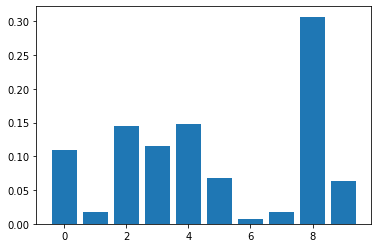

In [16]:
from matplotlib import pyplot
# feature importance
print(clf.feature_importances_)
# plot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [129]:
dataTrain.columns

Index(['Survived', 'Age', 'SibSp', 'Ticket', 'Fare', 'Sex_female', 'Pclass_3',
       'Pclass_2', 'Pclass_1', 'Mr', 'With_Cabin'],
      dtype='object')

In [17]:
dataTest = pd.read_csv('../testMap.csv')


In [18]:
dataTest.head()

,PassengerId,Age,SibSp,Ticket,Parch,Fare,Sex_female,Pclass_3,Pclass_2,Pclass_1,...,Embarked_S,Mr,Mrs,Miss,Master,Dr,OtherTitles,With_Cabin,Old,Kid
0,892,34.5,0,330911,0,7.8292,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,893,47.0,1,363272,0,7.0000,True,True,False,False,...,True,False,True,False,False,False,False,False,False,False
2,894,62.0,0,240276,0,9.6875,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
3,895,27.0,0,315154,0,8.6625,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
4,896,22.0,1,3101298,1,12.2875,True,True,False,False,...,True,False,True,False,False,False,False,False,False,False


In [19]:
dataTest["Fare"] = dataTest["Fare"].fillna(0)

In [20]:
dataTest = dataTest.drop("Embarked_Q",axis=1)
dataTest = dataTest.drop("Old",axis=1)
dataTest = dataTest.drop("Kid",axis=1)
dataTest = dataTest.drop("OtherTitles",axis=1)
dataTest = dataTest.drop("Dr",axis=1)
dataTest = dataTest.drop("Master",axis=1)
dataTest = dataTest.drop("Mrs",axis=1)
dataTest = dataTest.drop("Miss",axis=1)
dataTest = dataTest.drop("Embarked_S",axis=1)
dataTest = dataTest.drop("Parch",axis=1)
dataTest = dataTest.drop("Embarked_C",axis=1)


In [21]:
passengerId = dataTest["PassengerId"]
dataTest = dataTest.drop("PassengerId",axis=1)

In [22]:
X_test = scaler.fit_transform(dataTest)

In [23]:
result = clf.predict(X_test)

In [24]:
result

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [25]:
dataTest["PassengerId"] = passengerId
dataTest["Survived"] = result

In [26]:
dataTest[["PassengerId","Survived"]].to_csv('submitGBBalanceado.csv',index = False)
